In [1]:
import numpy as np
import scipy.optimize
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Read in data

In [2]:
# load in the data
data = pd.read_csv("../../data/competition_experiments/plate_reader_data/20200217_growth_test_wt_v_delta.csv",
                   comment='#', header=1)

In [3]:
data.dropna(inplace = True)

In [4]:
# convert time to minutes
data['time'] = np.linspace(0, 1380, 93)

# trim data above 800 to remove effects due to evaporation
data_trimmed = data[data['time'] < 1200]
data_trimmed = data
data_trimmed.tail()

,Time,Temp Read 2:600,B2,B3,B4,B5,B6,B7,B8,B9,...,F9,G2,G3,G4,G5,G6,G7,G8,G9,time
88,22:14:35,37.1,0.134,0.226,0.222,0.031,0.187,0.04,0.187,0.031,...,0.03,0.130,0.181,0.138,0.03,0.168,0.039,0.149,0.03,1320.0
89,22:29:35,37.1,0.132,0.221,0.223,0.031,0.186,0.04,0.188,0.030,...,0.03,0.131,0.175,0.133,0.03,0.165,0.039,0.147,0.03,1335.0
90,22:44:35,37.1,0.131,0.215,0.222,0.031,0.185,0.04,0.188,0.030,...,0.03,0.133,0.169,0.135,0.03,0.166,0.039,0.146,0.03,1350.0
91,22:59:35,37.0,0.129,0.209,0.220,0.031,0.185,0.04,0.188,0.031,...,0.03,0.128,0.164,0.135,0.03,0.166,0.039,0.146,0.03,1365.0
92,23:14:35,37.0,0.128,0.203,0.216,0.031,0.185,0.04,0.189,0.030,...,0.03,0.126,0.156,0.134,0.03,0.164,0.038,0.143,0.03,1380.0


## Plot the data

In [5]:
# create a list of names of replicates for each condition.
wt_gly = ["B2", "C2", "D2", "E2", "F2", "G2"]
wt_lac = ["B3", "C3", "D3", "E3", "F3", "G3"]
wt_both = ["B4", "C4", "D4", "E4", "F4", "G4"]
delta_gly = ["B6", "C6", "D6", "E6", "F6", "G6"]
delta_lac = ["B7", "C7", "D7", "E7", "F7", "G7"]
# D9 was plated instead of D8 because water was accidentally added into D8
delta_both = ["B8", "C8", "D9", "E8", "F8", "G8"]

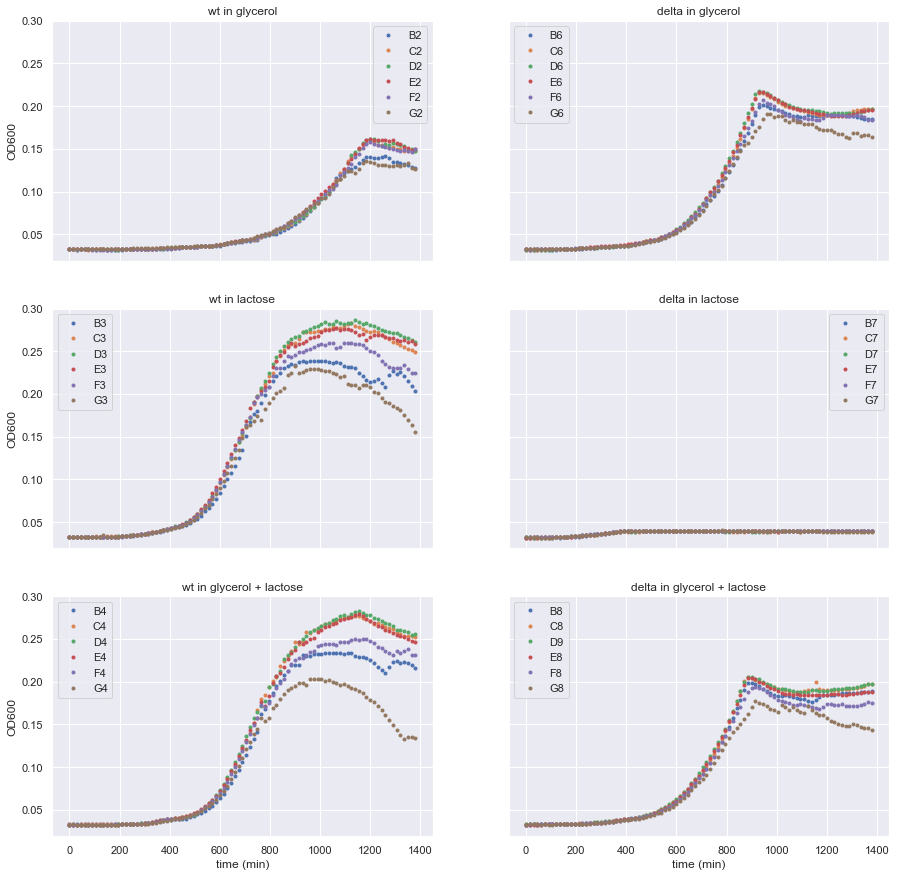

In [6]:
fig, axes = plt.subplots(3, 2, figsize=(15,15), sharex=True, sharey=True)

# plot all variants of wt_gly
for well in wt_gly:
    axes[0,0].plot(data_trimmed['time'], data_trimmed[well], '.', label=well)
axes[0,0].set_title("wt in glycerol")
axes[0,0].set_ylabel("OD600")
axes[0,0].legend()
    
for well in wt_lac:
    axes[1,0].plot(data_trimmed['time'], data_trimmed[well], '.', label=well)
axes[1,0].set_title("wt in lactose")
axes[1,0].set_ylabel("OD600")
axes[1,0].legend()
    
for well in wt_both:
    axes[2,0].plot(data_trimmed['time'], data_trimmed[well], '.', label=well)
axes[2,0].set_title("wt in glycerol + lactose")
axes[2,0].set_ylabel("OD600")
axes[2,0].set_xlabel("time (min)")
axes[2,0].legend()
    
for well in delta_gly:
    axes[0,1].plot(data_trimmed['time'], data_trimmed[well], '.', label=well)
axes[0,1].set_title("delta in glycerol")
axes[0,1].legend()
    
for well in delta_lac:
    axes[1,1].plot(data_trimmed['time'], data_trimmed[well], '.', label=well)
axes[1,1].set_title("delta in lactose")
axes[1,1].legend()
    
for well in delta_both:
    axes[2,1].plot(data_trimmed['time'], data_trimmed[well], '.', label=well)
axes[2,1].set_title("delta in glycerol + lactose")
axes[2,1].set_xlabel("time (min)")
axes[2,1].legend();

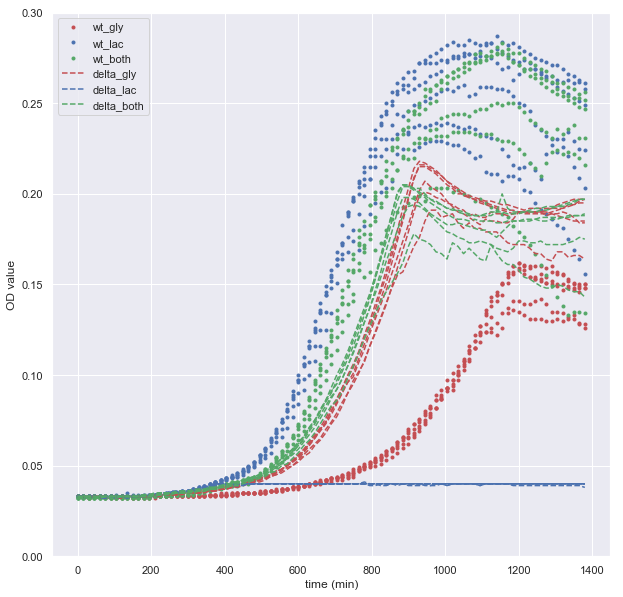

In [7]:
# loop through to plot conditions on top of each other to compare growth differences
conditions = [wt_gly, wt_lac, wt_both, delta_gly, delta_lac, delta_both]
condition_names = ['wt_gly', 'wt_lac', 'wt_both', 'delta_gly', 'delta_lac', 'delta_both']

# creat an array to loop through colors
colors = ['.r', '.b', '.g', '--r', '--b', '--g']

plt.figure(figsize=(10,10))

for color, condition, condition_name in zip(colors, conditions, condition_names):
    
    
    for i, well in enumerate(condition):
    
        if i == 0:
            
            plt.plot(data_trimmed['time'], data_trimmed[well], color, label=condition_name)
        
        else:
            plt.plot(data_trimmed['time'], data_trimmed[well], color, label='')
        
plt.xlabel("time (min)")
plt.ylabel("OD value")
plt.ylim([0,0.3])
plt.legend()
#plt.savefig('plot.eps')